In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.corpora import Dictionary

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import collections
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df_hanoi = pd.read_csv('clean_hanoi.csv')
df_danang = pd.read_csv('clean_danang.csv')

df_vn = pd.concat([df_hanoi, df_danang], ignore_index=True)
df_vn

,rating,date,travel_type,location,content,processed_text
0,4.0,2025-07,Friends,NaN,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...
1,5.0,2025-07,Couples,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...
2,5.0,2025-07,NaN,NaN,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...
3,5.0,2025-07,Friends,Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...
4,5.0,2025-07,NaN,NaN,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...
...,...,...,...,...,...,...
49766,4.0,2023-01,Friends,Australia,App & Theatre Shows Here’s what’s important: 1...,app theatre show important raining bring umbre...
49767,4.0,2023-01,Solo,Australia,A Visit Worth the Effort This is a step back i...,visit worth effort step back time visiting imp...
49768,5.0,2023-01,Couples,NaN,Our Rehahn experience We came across the galle...,rehahn experience came across gallery hochimin...
49769,5.0,2023-01,Family,NaN,Subliming Vietnam through pictures The Gallery...,subliming vietnam picture gallery minute walki...


In [4]:
df_bangkok = pd.read_csv('clean_bangkok.csv')
df_pattaya = pd.read_csv('clean_pattaya.csv')

df_tl = pd.concat([df_bangkok, df_pattaya], ignore_index=True)
df_tl

,rating,date,travel_type,location,content,processed_text
0,5,2025-07,Couples,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...
1,5,2025-07,Family,NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...
2,5,2025-07,Family,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...
3,5,2025-07,Friends,NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed u lot interestin...
4,5,2025-07,Solo,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...
...,...,...,...,...,...,...
16847,5,2023-01,Family,Australia,Great day out Well run water park from start t...,great day well run water park start finish wen...
16848,5,2023-01,Friends,Canada,Awesome beach The beach goes on for ever - res...,awesome beach beach go ever restaurant bar lun...
16849,4,2023-01,Friends,UK,Rainbow Beach 25 must go .. Look out for Rainb...,rainbow beach must go look rainbow beach jomti...
16850,3,2023-01,NaN,Denmark,Beautiful building - but do not come for the a...,beautiful building come animal rowing boat san...


**VN**

In [5]:
#Preprocessing for LDA

nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {'u', 'hanoi', 'vietnam', 'really', 'would', 'also', 'made', 'well', 'lot', 'great', 'amazing', 'good', 'best', 'nice', 'much', 'excellent', 'fun', 'beautiful', 'wonderful', 'fantastic', 'one', 'thank', 'visit', 'go', 'get', 'day', 'perfect', 'went', 'take'}
final_stopwords = nltk_stopwords.union(custom_stopwords)

def tokenize_text(text):
    words = word_tokenize(str(text))
    return [word for word in words if word not in final_stopwords]

df_vn['tokens'] = df_vn['processed_text'].apply(tokenize_text)

# Build bigram model
bigram_model = Phrases(df_vn['tokens'], min_count=5, threshold=5)  # tweak these for sensitivity
bigram_phraser = Phraser(bigram_model)

# Apply bigram transformation
df_vn['tokens_bigrams'] = df_vn['tokens'].apply(lambda x: bigram_phraser[x])

In [6]:
dictionary_vn = Dictionary(df_vn['tokens_bigrams'])
dictionary_vn.filter_extremes(no_below=5, no_above=0.5)
corpus_vn = [dictionary_vn.doc2bow(text) for text in df_vn['tokens_bigrams']]

#Train LDA model
lda_model_vn_7 = LdaModel(
    corpus=corpus_vn,
    id2word=dictionary_vn,
    num_topics=7,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Print output LDA topics with top 20 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_vn_7.show_topics(num_topics=7, num_words=20, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")


=== LDA Topics ===
Topic 0: ['food', 'cooking_class', 'experience', 'delicious', 'market', 'vietnamese', 'try', 'class', 'restaurant', 'cooking', 'dish', 'local', 'street_food', 'tried', 'eat', 'home', 'masseuse', 'culture', 'evening', 'coffee']
Topic 1: ['museum', 'building', 'pretty', 'impressive', 'garden', 'lantern', 'kid', 'fabric', 'theme_park', 'dont', 'high', 'pagoda', 'korean', 'history', 'large', 'son', 'im', 'statue', 'child', 'ticket']
Topic 2: ['place', 'hoi', 'time', 'da_nang', 'see', 'people', 'many', 'area', 'even', 'around', 'like', 'worth', 'bridge', 'way', 'ride', 'city', 'photo', 'could', 'must', 'visited']
Topic 3: ['massage', 'service', 'experience', 'spa', 'professional', 'relaxing', 'suit', 'tailor', 'staff', 'got', 'ba_na', 'quality', 'clean', 'come', 'recommend', 'back', 'came', 'price', 'dong_silk', 'friendly']
Topic 4: ['trip', 'time', 'experience', 'beach', 'hill', 'helpful', 'view', 'cruise', 'boat', 'family', 'activity', 'everyone', 'night', 'love', 'eve

In [27]:
topics = lda_model_vn_7.print_topics(num_words=20)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.034*"food" + 0.025*"cooking_class" + 0.024*"experience" + 0.023*"delicious" + 0.019*"market" + 0.017*"vietnamese" + 0.017*"try" + 0.015*"class" + 0.013*"restaurant" + 0.012*"cooking" + 0.011*"dish" + 0.010*"local" + 0.009*"street_food" + 0.009*"tried" + 0.008*"eat" + 0.008*"home" + 0.008*"masseuse" + 0.007*"culture" + 0.007*"evening" + 0.007*"coffee"
Topic 1: 0.012*"museum" + 0.011*"building" + 0.009*"pretty" + 0.009*"impressive" + 0.009*"garden" + 0.008*"lantern" + 0.008*"kid" + 0.008*"fabric" + 0.008*"theme_park" + 0.007*"dont" + 0.007*"high" + 0.006*"pagoda" + 0.006*"korean" + 0.006*"history" + 0.006*"large" + 0.006*"son" + 0.005*"im" + 0.005*"statue" + 0.005*"child" + 0.005*"ticket"
Topic 2: 0.028*"place" + 0.018*"hoi" + 0.012*"time" + 0.011*"da_nang" + 0.011*"see" + 0.010*"people" + 0.009*"many" + 0.008*"area" + 0.008*"even" + 0.007*"around" + 0.007*"like" + 0.007*"worth" + 0.007*"bridge" + 0.007*"way" + 0.007*"ride" + 0.006*"city" + 0.005*"photo" + 0.005*"could" + 0.00

In [32]:
vn_topic_labels = {
    0: "Culinary experience & cooking class",
    1: "Cultural & iconic attractions",
    2: "Sightseeing & exploration",
    3: "Spa & tailor services",
    4: "Beach & nature trip",
    5: "Guided tour",
    6: "Shopping & night markets"
}

In [ ]:
doc_topics = []
for doc_bow in corpus_vn:
    topic_distribution = lda_model_vn_7.get_document_topics(doc_bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    doc_topics.append(dominant_topic)

In [ ]:
# Add topic ID column
df_vn['topic_id'] = doc_topics

# Add topic label column
df_vn['topic_label'] = df_vn['topic_id'].map(vn_topic_labels)
df_vn

,rating,date,travel_type,location,content,processed_text,tokens,tokens_bigrams,topic_id,topic_label
0,4.0,2025-07,Friends,NaN,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...,"[hà, nội, like, food, people, friendly, many, ...","[hà_nội, like, food, people, friendly, many, p...",2,sightseeing
1,5.0,2025-07,Couples,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...,"[thing, thing, bella, host, selection, dish, c...","[thing, thing, bella_host, selection, dish_coo...",5,guided tour
2,5.0,2025-07,NaN,NaN,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...,"[teacher, bright, food, together, meal, enjoye...","[teacher, bright, food, together, meal, enjoye...",0,gastronomy
3,5.0,2025-07,Friends,Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...,"[friendly, happy, experience, class, timing, v...","[friendly, happy, experience, class, timing, v...",0,gastronomy
4,5.0,2025-07,NaN,NaN,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...,"[absolutely, time, cooking, class, sunny, info...","[absolutely, time, cooking_class, sunny, infor...",5,guided tour
...,...,...,...,...,...,...,...,...,...,...
49766,4.0,2023-01,Friends,Australia,App & Theatre Shows Here’s what’s important: 1...,app theatre show important raining bring umbre...,"[app, theatre, show, important, raining, bring...","[app, theatre, show, important, raining, bring...",2,sightseeing
49767,4.0,2023-01,Solo,Australia,A Visit Worth the Effort This is a step back i...,visit worth effort step back time visiting imp...,"[worth, effort, step, back, time, visiting, im...","[worth_effort, step, back, time, visiting, imp...",2,sightseeing
49768,5.0,2023-01,Couples,NaN,Our Rehahn experience We came across the galle...,rehahn experience came across gallery hochimin...,"[rehahn, experience, came, across, gallery, ho...","[rehahn, experience, came_across, gallery, hoc...",2,sightseeing
49769,5.0,2023-01,Family,NaN,Subliming Vietnam through pictures The Gallery...,subliming vietnam picture gallery minute walki...,"[subliming, picture, gallery, minute, walking,...","[subliming, picture, gallery, minute, walking_...",2,sightseeing


In [ ]:
df_sentiment_hanoi = pd.read_csv('hanoi_sentiment.csv')
df_sentiment_danang = pd.read_csv('danang_sentiment.csv')

df_sentiment_vn = pd.concat([df_sentiment_hanoi, df_sentiment_danang], ignore_index=True)
df_sentiment_vn

,processed_text,score_RoBERTa,intensity_RoBERTa,resultRoBERTa,rating,date,travel_type,location
0,hà nội really like good food nice people frien...,[0.01699371 0.08790884 0.89509743],0.878,Positive,4.0,2025-07,Friends,NaN
1,passion plate thanks evelyn big thanks evelyn ...,[0.00149713 0.01079737 0.98770547],0.986,Positive,5.0,2025-07,Friends,NaN
2,excellent food tour best hidden dish excellent...,[0.00196928 0.01133113 0.9866996 ],0.985,Positive,5.0,2025-07,Friends,NaN
3,best food tour patrick back great authentic fo...,[0.0015648 0.01372731 0.98470783],0.983,Positive,5.0,2025-07,Friends,NaN
4,great street food tour max great delicious str...,[0.00159184 0.00996857 0.98843956],0.987,Positive,5.0,2025-07,Family,Israel
...,...,...,...,...,...,...,...,...
47083,app theatre show important raining bring umbre...,[0.07968553 0.79999715 0.12031735],0.041,Neutral,4.0,2023-01,Friends,Australia
47084,visit worth effort step back time visiting imp...,[0.00912691 0.18701436 0.8038587 ],0.795,Positive,4.0,2023-01,Solo,Australia
47085,rehahn experience came across gallery hochimin...,[0.00176639 0.02259012 0.97564346],0.974,Positive,5.0,2023-01,Couples,NaN
47086,subliming vietnam picture gallery minute walki...,[0.01031484 0.15958993 0.83009523],0.820,Positive,5.0,2023-01,Family,NaN


In [ ]:
# Drop duplicates based on processed_text
df_vn = df_vn.drop_duplicates(subset='processed_text')
df_sentiment_vn = df_sentiment_vn.drop_duplicates(subset='processed_text')

In [ ]:
# Inner merge to keep only matching rows
df_vn_merged = pd.merge(df_vn, df_sentiment_vn, on='processed_text', how='inner')

In [ ]:
print(df_vn_merged[['processed_text', 'topic_label', 'intensity_RoBERTa', 'resultRoBERTa']].head())

                                      processed_text  topic_label  \
0  hà nội really like good food nice people frien...  sightseeing   
1  passion plate thanks evelyn big thanks evelyn ...  sightseeing   
2  excellent food tour best hidden dish excellent...  sightseeing   
3  best food tour patrick back great authentic fo...  guided tour   
4  great street food tour max great delicious str...   gastronomy   

   intensity_RoBERTa resultRoBERTa  
0              0.878      Positive  
1              0.986      Positive  
2              0.985      Positive  
3              0.983      Positive  
4              0.987      Positive  


In [ ]:
# Count sentiment labels per topic
sentiment_by_topic = df_vn_merged.groupby('topic_id')['resultRoBERTa'].value_counts(normalize=True).unstack().fillna(0)

# Average sentiment score per topic
avg_score_by_topic = df_vn_merged.groupby('topic_id')['intensity_RoBERTa'].mean()

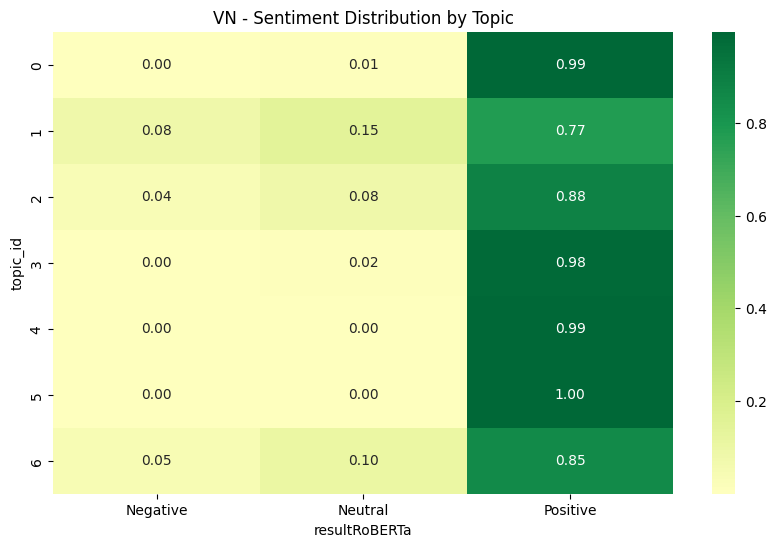

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_by_topic, annot=True, cmap="RdYlGn", fmt=".2f", center=0)
plt.title("VN - Sentiment Distribution by Topic")
plt.savefig('VN_IPA.jpg', dpi = 300, bbox_inches='tight')
plt.show()

**TL**

In [7]:
#Preprocessing for LDA

nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {'great', 'good', 'amazing', 'also', 'nice', 'one', 'lot', 'u', 'get', 'go', 'day', 'best', 'really', 'many', 'thailand', 'thai', 'like', 'excellent', 'much', 'see', 'visit', 'well', 'around', 'take', 'way', 'would', 'went', 'city', 'beautiful', 'made', 'must'}
final_stopwords = nltk_stopwords.union(custom_stopwords)

def tokenize_text(text):
    words = word_tokenize(str(text))
    return [word for word in words if word not in final_stopwords]

df_tl['tokens'] = df_tl['processed_text'].apply(tokenize_text)

# Build bigram model
bigram_model = Phrases(df_tl['tokens'], min_count=5, threshold=5)  # tweak these for sensitivity
bigram_phraser = Phraser(bigram_model)

# Apply bigram transformation
df_tl['tokens_bigrams'] = df_tl['tokens'].apply(lambda x: bigram_phraser[x])

In [8]:
dictionary_tl = Dictionary(df_tl['tokens_bigrams'])
dictionary_tl.filter_extremes(no_below=5, no_above=0.5)
corpus_tl = [dictionary_tl.doc2bow(text) for text in df_tl['tokens_bigrams']]

#Train LDA model
lda_model_tl = LdaModel(
    corpus=corpus_tl,
    id2word=dictionary_tl,
    num_topics=12,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Print output LDA topics with top 10 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_tl.show_topics(num_topics=12, num_words=20, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")


=== LDA Topics ===
Topic 0: ['place', 'shop', 'mall', 'shopping', 'price', 'restaurant', 'buy', 'street', 'market', 'find', 'everything', 'store', 'big', 'cheap', 'shopping_mall', 'food_court', 'food', 'floor', 'product', 'item']
Topic 1: ['boat', 'baht', 'pay', 'price', 'min', 'sea', 'seems', 'scam', 'driver', 'water', 'tourist_trap', 'bath', 'overpriced', 'expensive', 'hour', 'b', 'dirty', 'cost', 'transfer', 'ok']
Topic 2: ['class', 'dish', 'carving', 'rice', 'fee', 'cooking', 'ingredient', 'cooking_class', 'seafood', 'snake', 'definitely_come', 'market', 'simple', 'satisfied', 'cooked', 'mango_sticky', 'wat', 'n', 'morning', 'teacher']
Topic 3: ['pattaya', 'time', 'people', 'back', 'come', 'need', 'better', 'want', 'minute', 'ride', 'long', 'tourist', 'first', 'water', 'think', 'place', 'thing', 'always', 'dont', 'clean']
Topic 4: ['tour', 'bangkok', 'food', 'fun', 'guide', 'beach', 'tour_guide', 'night', 'highly_recommend', 'local', 'time', 'fantastic', 'took', 'tuk_tuk', 'experi

In [24]:
topics = lda_model_tl.print_topics(num_words=20)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.073*"place" + 0.026*"shop" + 0.022*"mall" + 0.018*"shopping" + 0.017*"price" + 0.014*"restaurant" + 0.012*"buy" + 0.012*"street" + 0.011*"market" + 0.010*"find" + 0.010*"everything" + 0.009*"store" + 0.009*"big" + 0.008*"cheap" + 0.008*"shopping_mall" + 0.008*"food_court" + 0.007*"food" + 0.007*"floor" + 0.007*"product" + 0.006*"item"
Topic 1: 0.057*"boat" + 0.030*"baht" + 0.029*"pay" + 0.021*"price" + 0.017*"min" + 0.013*"sea" + 0.013*"seems" + 0.013*"scam" + 0.013*"driver" + 0.012*"water" + 0.012*"tourist_trap" + 0.011*"bath" + 0.011*"overpriced" + 0.010*"expensive" + 0.010*"hour" + 0.010*"b" + 0.010*"dirty" + 0.010*"cost" + 0.009*"transfer" + 0.009*"ok"
Topic 2: 0.019*"class" + 0.017*"dish" + 0.015*"carving" + 0.013*"rice" + 0.012*"fee" + 0.012*"cooking" + 0.011*"ingredient" + 0.011*"cooking_class" + 0.010*"seafood" + 0.010*"snake" + 0.010*"definitely_come" + 0.010*"market" + 0.009*"simple" + 0.009*"satisfied" + 0.008*"cooked" + 0.008*"mango_sticky" + 0.008*"wat" + 0.008*

In [31]:
tl_topic_labels = {
    0: "Shopping & local markets",
    1: "Tourist targeted scam",
    2: "Culinary experience & cooking class",
    3: "Family oriented activity",
    4: "Guided tour",
    5: "Entertainment venues",
    6: "Nightlife",
    7: "Leisure activities",
    8: "Service & hospitality",
    9: "Cultural sites and architects",
    10: "Float & train market",
    11: "Parks & zoos"
}

In [ ]:
doc_topics_tl = []
for doc_bow in corpus_tl:
    topic_distribution = lda_model_tl.get_document_topics(doc_bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    doc_topics_tl.append(dominant_topic)

In [ ]:
# Add topic ID column
df_tl['topic_id'] = doc_topics_tl

# Add topic label column
df_tl['topic_label'] = df_tl['topic_id'].map(tl_topic_labels)
df_tl

,rating,date,travel_type,location,content,processed_text,tokens,tokens_bigrams,topic_id,topic_label
0,5,2025-07,Couples,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...,"[tour, anna, tour, guide, alot, fun, saw, impo...","[tour_anna, tour_guide, alot, fun, saw, import...",4,guided tour
1,5,2025-07,Family,NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...,"[boat, tour, excursion, fun, ken, attentive, h...","[boat, tour, excursion, fun, ken, attentive, h...",8,service & hospitality
2,5,2025-07,Family,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...,"[thon, buri, canal, trip, insight, thon, buri,...","[thon_buri, canal, trip, insight, thon_buri, c...",4,guided tour
3,5,2025-07,Friends,NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed u lot interestin...,"[tour, guide, showed, interesting, thing, big,...","[tour_guide, showed, interesting_thing, big_li...",8,service & hospitality
4,5,2025-07,Solo,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...,"[experience, definitely, guide, fantastic, dri...","[experience, definitely, guide, fantastic, dri...",4,guided tour
...,...,...,...,...,...,...,...,...,...,...
16847,5,2023-01,Family,Australia,Great day out Well run water park from start t...,great day well run water park start finish wen...,"[run, water, park, start, finish, quiet, didnt...","[run, water_park, start_finish, quiet, didnt, ...",11,parks & zoos
16848,5,2023-01,Friends,Canada,Awesome beach The beach goes on for ever - res...,awesome beach beach go ever restaurant bar lun...,"[awesome, beach, beach, ever, restaurant, bar,...","[awesome, beach_beach, ever, restaurant_bar, l...",4,guided tour
16849,4,2023-01,Friends,UK,Rainbow Beach 25 must go .. Look out for Rainb...,rainbow beach must go look rainbow beach jomti...,"[rainbow, beach, look, rainbow, beach, jomtien...","[rainbow, beach, look, rainbow, beach_jomtien,...",4,guided tour
16850,3,2023-01,NaN,Denmark,Beautiful building - but do not come for the a...,beautiful building come animal rowing boat san...,"[building, come, animal, rowing, boat, sanctua...","[building, come, animal, rowing_boat, sanctuar...",11,parks & zoos


In [ ]:
df_sentiment_bangkok = pd.read_csv('bangkok_sentiment.csv')
df_sentiment_pattaya = pd.read_csv('pattaya_sentiment.csv')

df_sentiment_tl = pd.concat([df_sentiment_bangkok, df_sentiment_pattaya], ignore_index=True)
df_sentiment_tl

,processed_text,score_RoBERTa,intensity_RoBERTa,resultRoBERTa,rating,date,travel_type,location
0,great tour anna great tour guide alot fun saw ...,[0.00182574 0.0134236 0.9847506 ],0.983,Positive,5,2025-07,Couples,NaN
1,boat tour excellent excursion fun ken attentiv...,[0.00201899 0.02288288 0.9750981 ],0.973,Positive,5,2025-07,Family,NaN
2,thon buri canal trip great insight thon buri c...,[0.00273481 0.0419921 0.95527303],0.953,Positive,5,2025-07,Family,NaN
3,great tour great guide showed u lot interestin...,[0.00292292 0.02523496 0.9718421 ],0.969,Positive,5,2025-07,Friends,NaN
4,must great experience would definitely guide f...,[0.00281898 0.02788064 0.96930045],0.966,Positive,5,2025-07,Solo,NaN
...,...,...,...,...,...,...,...,...
17196,great day well run water park start finish wen...,[0.00242676 0.01431447 0.9832587 ],0.981,Positive,5,2023-01,Family,Australia
17197,awesome beach beach go ever restaurant bar lun...,[0.00277176 0.13596162 0.8612667 ],0.858,Positive,5,2023-01,Friends,Canada
17198,rainbow beach must go look rainbow beach jomti...,[0.00266137 0.03125554 0.9660831 ],0.963,Positive,4,2023-01,Friends,UK
17199,beautiful building come animal rowing boat san...,[0.00985712 0.12159052 0.8685523 ],0.859,Positive,3,2023-01,NaN,Denmark


In [ ]:
# Drop duplicates based on processed_text
df_tl = df_tl.drop_duplicates(subset='processed_text')
df_sentiment_tl = df_sentiment_tl.drop_duplicates(subset='processed_text')

In [ ]:
# Inner merge to keep only matching rows
df_tl_merged = pd.merge(df_tl, df_sentiment_tl, on='processed_text', how='inner')

In [ ]:
print(df_tl_merged[['processed_text', 'topic_label', 'intensity_RoBERTa', 'resultRoBERTa']].head())

                                      processed_text            topic_label  \
0  great tour anna great tour guide alot fun saw ...            guided tour   
1  boat tour excellent excursion fun ken attentiv...  service & hospitality   
2  thon buri canal trip great insight thon buri c...            guided tour   
3  great tour great guide showed u lot interestin...  service & hospitality   
4  must great experience would definitely guide f...            guided tour   

   intensity_RoBERTa resultRoBERTa  
0              0.983      Positive  
1              0.973      Positive  
2              0.953      Positive  
3              0.969      Positive  
4              0.966      Positive  


In [ ]:
# Count sentiment labels per topic
sentiment_by_topic = df_tl_merged.groupby('topic_id')['resultRoBERTa'].value_counts(normalize=True).unstack().fillna(0)

# Average sentiment score per topic
avg_score_by_topic = df_tl_merged.groupby('topic_id')['intensity_RoBERTa'].mean()

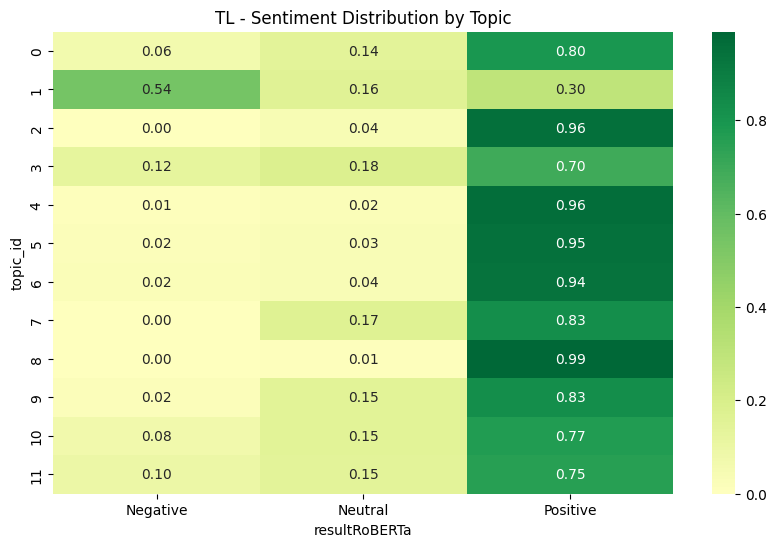

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_by_topic, annot=True, cmap="RdYlGn", fmt=".2f", center=0)
plt.title("TL - Sentiment Distribution by Topic")
plt.savefig('TL_IPA.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
topic_counts_by_travel_type_tl = df_tl.groupby('travel_type')['topic_label'].value_counts().unstack().fillna(0)
topic_counts_by_travel_type_tl_percent = topic_counts_by_travel_type_tl.apply(lambda x: x / x.sum(), axis=1)
formatted_topic_counts_tl_percent = topic_counts_by_travel_type_tl_percent.applymap(lambda x: f"{x:.2%}")
display(formatted_topic_counts_tl_percent)

/tmp/ipython-input-1766259849.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_topic_counts_tl_percent = topic_counts_by_travel_type_tl_percent.applymap(lambda x: f"{x:.2%}")


topic_label,entertainment venues,float & train markets,gastronomy,general reflection,guided tour,hidden gems,nightlife,parks & zoos,scam concerns,service & hospitality,shopping & local markets,temples & cultural architecture
travel_type,,,,,,,,,,,,
Business,3.12%,0.00%,0.45%,20.09%,37.05%,0.00%,1.34%,7.14%,0.00%,7.14%,16.96%,6.70%
Couples,1.54%,1.30%,0.51%,14.01%,45.49%,0.11%,1.30%,9.15%,0.72%,8.74%,12.64%,4.49%
Family,1.18%,0.85%,0.45%,17.75%,41.60%,0.05%,0.99%,8.59%,0.78%,12.16%,12.35%,3.24%
Friends,3.71%,0.82%,0.60%,15.66%,40.46%,0.03%,0.76%,7.83%,0.35%,12.81%,13.32%,3.65%
Solo,1.59%,0.76%,0.72%,16.11%,44.78%,0.07%,0.65%,8.63%,0.51%,11.34%,10.80%,4.04%


In [ ]:
topic_counts_by_travel_type_vn = df_vn.groupby('travel_type')['topic_label'].value_counts().unstack().fillna(0)
topic_counts_by_travel_type_vn_percent = topic_counts_by_travel_type_vn.apply(lambda x: x / x.sum(), axis=1)
formatted_topic_counts_vn_percent = topic_counts_by_travel_type_vn_percent.applymap(lambda x: f"{x:.2%}")
display(formatted_topic_counts_vn_percent)

/tmp/ipython-input-2340693074.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_topic_counts_vn_percent = topic_counts_by_travel_type_vn_percent.applymap(lambda x: f"{x:.2%}")


topic_label,beach & nature,cultural & iconic attractions,gastronomy,guided tour,shopping & night markets,sightseeing,spa & tailor
travel_type,,,,,,,
Business,9.48%,1.55%,8.70%,15.09%,3.09%,23.40%,38.68%
Couples,12.20%,0.84%,5.59%,22.66%,2.22%,32.34%,24.17%
Family,17.69%,0.82%,5.83%,25.39%,1.71%,29.06%,19.51%
Friends,17.92%,0.51%,6.77%,25.91%,1.76%,22.34%,24.78%
Solo,8.71%,0.62%,5.79%,24.39%,1.74%,26.82%,31.93%


In [ ]:
topic_counts_by_location_vn = df_vn.groupby('location')['topic_label'].value_counts().unstack().fillna(0)

# Get top 10 locations for Vietnam data
top_10_locations_vn = topic_counts_by_location_vn.sum(axis=1).nlargest(10).index

# Filter the Vietnam topic counts table for top 10 locations
topic_counts_by_location_vn_top10 = topic_counts_by_location_vn.loc[top_10_locations_vn]

topic_counts_by_location_vn_top10_percent = topic_counts_by_location_vn_top10.apply(lambda x: x / x.sum(), axis=1)
formatted_topic_counts_by_location_vn_top10_percent = topic_counts_by_location_vn_top10_percent.applymap(lambda x: f"{x:.2%}")
display(formatted_topic_counts_by_location_vn_top10_percent)

/tmp/ipython-input-2772432075.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_topic_counts_by_location_vn_top10_percent = topic_counts_by_location_vn_top10_percent.applymap(lambda x: f"{x:.2%}")


topic_label,beach & nature,cultural & iconic attractions,gastronomy,guided tour,shopping & night markets,sightseeing,spa & tailor
location,,,,,,,
Australia,6.47%,1.04%,4.12%,20.62%,3.34%,46.40%,18.01%
UK,7.59%,1.80%,3.42%,15.30%,3.19%,51.77%,16.93%
Vietnam,4.84%,1.87%,1.56%,7.33%,2.18%,51.64%,30.58%
India,21.94%,0.72%,0.90%,12.95%,5.58%,51.80%,6.12%
France,14.59%,1.75%,3.89%,6.81%,7.00%,46.30%,19.65%
Singapore,8.18%,0.41%,4.50%,11.66%,3.27%,43.56%,28.43%
Canada,4.68%,3.12%,5.57%,17.59%,3.12%,46.77%,19.15%
Germany,4.44%,1.87%,4.44%,14.02%,3.27%,49.77%,22.20%
CA,5.73%,1.91%,3.82%,17.90%,4.06%,45.35%,21.24%


In [ ]:
topic_counts_by_location_tl = df_tl.groupby('location')['topic_label'].value_counts().unstack().fillna(0)

# Get top 10 locations for Thailand data
top_10_locations_tl = topic_counts_by_location_tl.sum(axis=1).nlargest(10).index

# Filter the Thailand topic counts table for top 10 locations
topic_counts_by_location_tl_top10 = topic_counts_by_location_tl.loc[top_10_locations_tl]

topic_counts_by_location_tl_top10_percent = topic_counts_by_location_tl_top10.apply(lambda x: x / x.sum(), axis=1)
formatted_topic_counts_by_location_tl_top10_percent = topic_counts_by_location_tl_top10_percent.applymap(lambda x: f"{x:.2%}")
display(formatted_topic_counts_by_location_tl_top10_percent)

/tmp/ipython-input-890330600.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_topic_counts_by_location_tl_top10_percent = topic_counts_by_location_tl_top10_percent.applymap(lambda x: f"{x:.2%}")


topic_label,entertainment venues,float & train markets,gastronomy,general reflection,guided tour,hidden gems,nightlife,parks & zoos,scam concerns,service & hospitality,shopping & local markets,temples & cultural architecture
location,,,,,,,,,,,,
UK,1.56%,1.48%,0.25%,19.24%,37.17%,0.00%,1.89%,12.58%,0.82%,4.69%,13.32%,6.99%
Australia,0.53%,2.30%,0.53%,16.61%,44.17%,0.00%,1.41%,7.95%,0.35%,4.24%,16.43%,5.48%
Thailand,2.51%,0.42%,0.42%,24.90%,21.55%,0.21%,1.46%,12.55%,0.84%,6.90%,22.18%,6.07%
Germany,1.71%,1.71%,0.34%,19.18%,25.00%,0.34%,1.37%,17.81%,1.37%,4.79%,18.15%,8.22%
Italy,1.37%,2.41%,0.00%,23.37%,19.59%,0.00%,2.41%,14.09%,0.69%,3.78%,18.56%,13.75%
France,1.47%,1.10%,0.00%,21.25%,19.41%,0.00%,1.10%,19.05%,1.10%,1.83%,21.61%,12.09%
India,0.39%,0.78%,0.00%,21.18%,16.86%,0.00%,2.35%,17.25%,0.00%,6.67%,29.80%,4.71%
Singapore,0.79%,0.79%,1.57%,20.08%,19.69%,0.39%,1.97%,11.02%,0.39%,4.72%,32.28%,6.30%
CA,1.61%,0.80%,1.20%,16.87%,47.79%,0.00%,0.00%,10.84%,0.80%,3.61%,9.64%,6.83%


In [ ]:
output_excel_file = 'topic_distributions.xlsx'

with pd.ExcelWriter(output_excel_file) as writer:
    formatted_topic_counts_tl_percent.to_excel(writer, sheet_name='TL_Travel_Type_Percent')
    formatted_topic_counts_vn_percent.to_excel(writer, sheet_name='VN_Travel_Type_Percent')
    formatted_topic_counts_by_location_vn_top10_percent.to_excel(writer, sheet_name='VN_Top10_Location_Percent')
    formatted_topic_counts_by_location_tl_top10_percent.to_excel(writer, sheet_name='TL_Top10_Location_Percent')

print(f"DataFrames exported to {output_excel_file}")

DataFrames exported to topic_distributions.xlsx


In [ ]:
# Count topic label occurrences for Vietnam
topic_counts_vn = df_vn['topic_label'].value_counts()

# Calculate percentage contribution for Vietnam
topic_percentages_vn = topic_counts_vn / len(df_vn) * 100

print("Vietnam Topic Distribution (Percentage):")
display(topic_percentages_vn)

Vietnam Topic Distribution (Percentage):


,count
topic_label,
sightseeing,28.653232
spa & tailor,24.510257
guided tour,24.070242
beach & nature,14.054369
gastronomy,6.003496
shopping & night markets,1.967009
cultural & iconic attractions,0.741396


In [ ]:
# Count topic label occurrences for Thailand
topic_counts_tl = df_tl['topic_label'].value_counts()

# Calculate percentage contribution for Thailand
topic_percentages_tl = topic_counts_tl / len(df_tl) * 100

print("\nThailand Topic Distribution (Percentage):")
display(topic_percentages_tl)


Thailand Topic Distribution (Percentage):


,count
topic_label,
guided tour,42.867315
general reflection,16.093045
shopping & local markets,12.449561
service & hospitality,10.610017
parks & zoos,8.746736
temples & cultural architecture,4.082601
entertainment venues,1.881082
float & train markets,1.026584
nightlife,1.014716


In [ ]:
# Topic labels
topic_labels = {
    0: "gastronomy",
    1: "cultural & iconic attractions",
    2: "sightseeing",
    3: "spa & tailor",
    4: "beach & nature",
    5: "guided tour",
    6: "shopping & night markets"
}

# Importance (topic frequency)
importance = {
    0: 6.003496,
    1: 0.741396,
    2: 28.653232,
    3: 24.510257,
    4: 14.054369,
    5: 24.070242,
    6: 1.967009
}

# Performance (sentiment intensity score from heatmap)
performance = {
    0: 0.99,
    1: 0.77,
    2: 0.88,
    3: 0.98,
    4: 0.99,
    5: 1.00,
    6: 0.85
}

# Rescale performance to reduce skew (optional)
def rescale(score):
    return (score - 0.75) / (1.00 - 0.75)  # maps 0.75–1.00 → 0–1

# Create DataFrame
ipa_df = pd.DataFrame({
    'topic_id': list(topic_labels.keys()),
    'topic_label': [topic_labels[i] for i in topic_labels],
    'importance': [importance[i] for i in topic_labels],
    'performance_raw': [performance[i] for i in topic_labels],
    'performance': [rescale(performance[i]) for i in topic_labels],
    'size': [importance[i]*1000 for i in topic_labels]  # optional bubble size
})

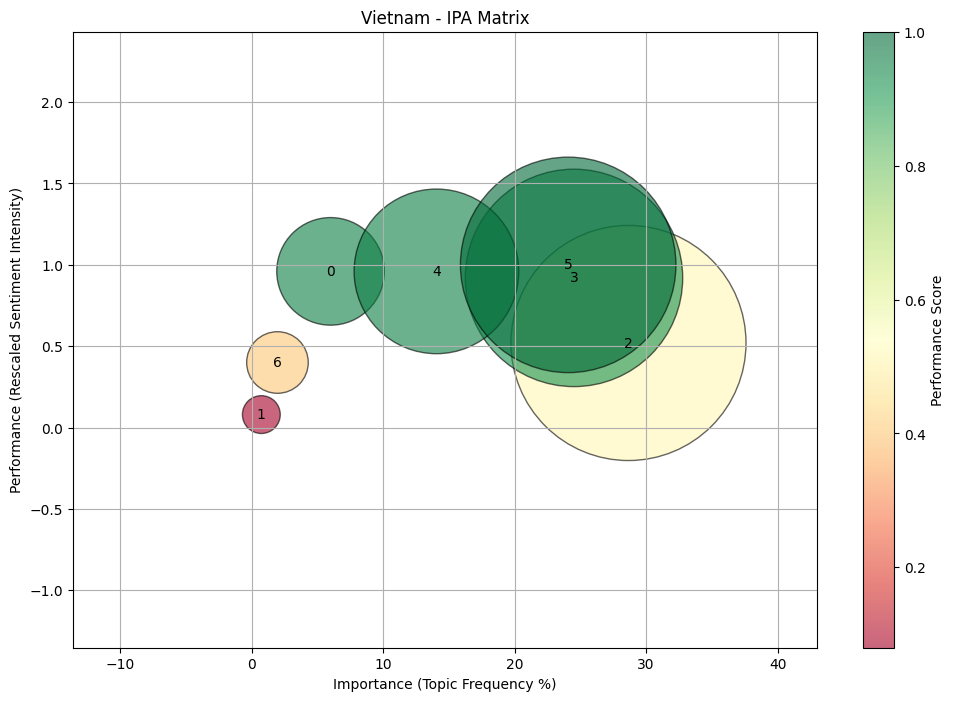

In [ ]:
plt.figure(figsize=(12, 8)) # Increased figure size
scatter = plt.scatter(
    ipa_df['importance'],
    ipa_df['performance'],
    s=ipa_df['size'] * 1.0, # Increased bubble size scaling
    alpha=0.6,
    c=ipa_df['performance'],
    cmap='RdYlGn',
    edgecolors='black'
)

# Add labels
texts = []
for i, row in ipa_df.iterrows():
    texts.append(plt.text(row['importance'], row['performance'], row['topic_id'], fontsize=10, ha='center', va='center'))

# Add quadrants


# Adjust axis limits to accommodate all bubbles
x_min, x_max = ipa_df['importance'].min() - ipa_df['size'].max()*1.0/2000, ipa_df['importance'].max() + ipa_df['size'].max()*1.0/2000 # Adjusted limits based on max bubble size
y_min, y_max = ipa_df['performance'].min() - ipa_df['size'].max()*1.0/20000, ipa_df['performance'].max() + ipa_df['size'].max()*1.0/20000 # Adjusted limits based on max bubble size
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


# Axis labels and title
plt.xlabel("Importance (Topic Frequency %)")
plt.ylabel("Performance (Rescaled Sentiment Intensity)")
plt.title("Vietnam - IPA Matrix")
plt.grid(True)
plt.colorbar(scatter, label="Performance Score")
plt.savefig('IPA matrix_VN.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
# Topic labels
topic_labels = {
    0: "shopping & local markets",
    1: "scam concerns",
    2: "gastronomy",
    3: "general reflection",
    4: "guided tour",
    5: "entertainment venues",
    6: "nightlife",
    7: "hidden gems",
    8: "service & hospitality",
    9: "temples & cultural architecture",
    10: "float & train markets",
    11: "parks & zoos"
}

# Importance (topic frequency)
importance = {
    0: 12.449561,
    1: 0.605269,
    2: 0.551863,
    3: 16.093045,
    4: 42.867315,
    5: 1.881082,
    6: 1.014716,
    7: 0.071208,
    8: 10.610017,
    9: 4.082601,
    10: 1.026584,
    11: 8.746736
}

# Performance (sentiment intensity from heatmap)
performance = {
    0: 0.80,
    1: 0.30,
    2: 0.96,
    3: 0.70,
    4: 0.96,
    5: 0.95,
    6: 0.94,
    7: 0.83,
    8: 0.99,
    9: 0.83,
    10: 0.77,
    11: 0.75
}

# Rescale performance to reduce skew
def rescale(score):
    return (score - 0.30) / (0.99 - 0.30)  # maps 0.30–0.99 → 0–1

# Create DataFrame
ipa_df = pd.DataFrame({
    'topic_id': list(topic_labels.keys()),
    'topic_label': [topic_labels[i] for i in topic_labels],
    'importance': [importance[i] for i in topic_labels],
    'performance_raw': [performance[i] for i in topic_labels],
    'performance': [rescale(performance[i]) for i in topic_labels],
    'size': [importance[i]*1000 for i in topic_labels]  # optional bubble size
})

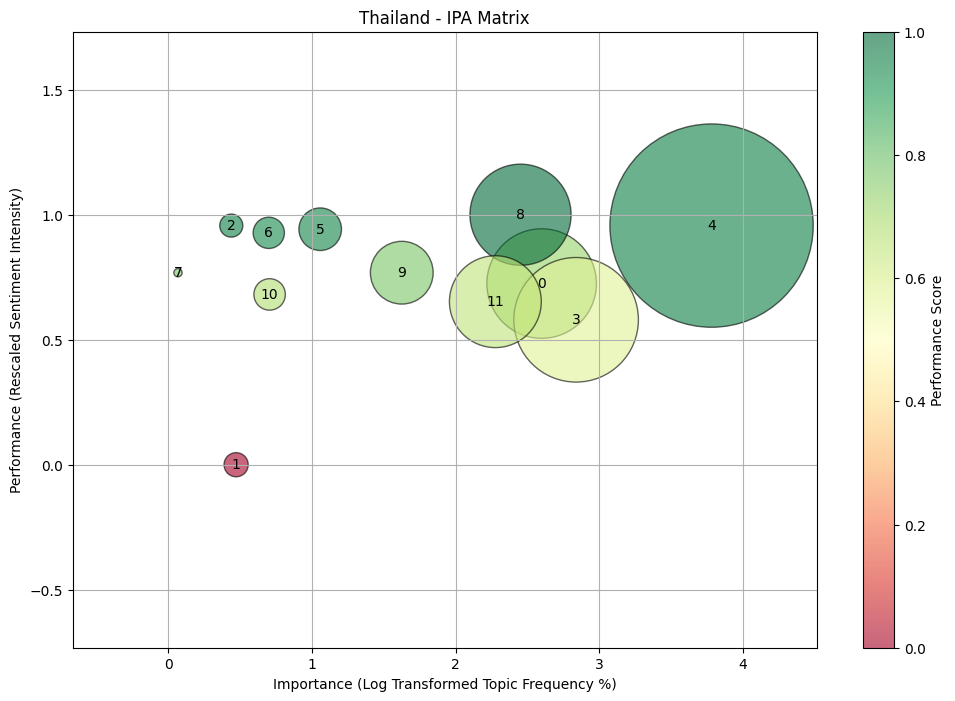

In [ ]:
import numpy as np

plt.figure(figsize=(12, 8)) # Increased figure size
scatter = plt.scatter(
    np.log1p(ipa_df['importance']), # Apply log1p transformation for importance
    ipa_df['performance'],
    s=ipa_df['size'] * 0.5, # Reduced bubble size scaling
    alpha=0.6,
    c=ipa_df['performance'],
    cmap='RdYlGn',
    edgecolors='black'
)

# Add labels
texts = []
for i, row in ipa_df.iterrows():
    texts.append(plt.text(np.log1p(row['importance']), row['performance'], row['topic_id'], fontsize=10, ha='center', va='center'))


# Add quadrants


# Adjust axis limits to accommodate all bubbles and compress more
x_min_data = np.log1p(ipa_df['importance'].min())
x_max_data = np.log1p(ipa_df['importance'].max())
y_min_data = ipa_df['performance'].min()
y_max_data = ipa_df['performance'].max()

# Calculate padding based on max bubble size (scaled)
max_bubble_size_scaled = ipa_df['size'].max() * 0.5
x_padding = np.sqrt(max_bubble_size_scaled) / 200 # Heuristic based on visual inspection and trial/error
y_padding = np.sqrt(max_bubble_size_scaled) / 200 # Heuristic based on visual inspection and trial/error


plt.xlim(x_min_data - x_padding, x_max_data + x_padding)
plt.ylim(y_min_data - y_padding, y_max_data + y_padding)


# Axis labels and title
plt.xlabel("Importance (Log Transformed Topic Frequency %)") # Update label to reflect transformation
plt.ylabel("Performance (Rescaled Sentiment Intensity)")
plt.title("Thailand - IPA Matrix")
plt.grid(True)
plt.colorbar(scatter, label="Performance Score")
plt.savefig('IPA matrix_TL.jpg', dpi = 300, bbox_inches='tight')
plt.show()

**JS-Distance**

In [9]:
# VN model
vn_topics = {
    i: dict(lda_model_vn_7.show_topic(i, topn=30)) for i in range(lda_model_vn_7.num_topics)
}

# TL model
tl_topics = {
    i: dict(lda_model_tl.show_topic(i, topn=30)) for i in range(lda_model_tl.num_topics)
}

In [10]:
# Union of all top words
vocab = set()
for topic in list(vn_topics.values()) + list(tl_topics.values()):
    vocab.update(topic.keys())
vocab = sorted(vocab)

#Vectorize
def vectorize_topic(topic_dict, vocab):
    return np.array([topic_dict.get(word, 0.0) for word in vocab])

vn_vectors = {i: vectorize_topic(vn_topics[i], vocab) for i in vn_topics}
tl_vectors = {j: vectorize_topic(tl_topics[j], vocab) for j in tl_topics}

In [35]:
from scipy.spatial.distance import jensenshannon

distance_matrix = pd.DataFrame(index=vn_vectors.keys(), columns=tl_vectors.keys())

for i in vn_vectors:
    for j in tl_vectors:
        distance = jensenshannon(vn_vectors[i], tl_vectors[j])
        distance_matrix.loc[i, j] = round(distance, 4)

In [36]:
alignment = {}
for vn_topic in distance_matrix.index:
    closest_tl_topic = distance_matrix.loc[vn_topic].astype(float).idxmin()
    score = distance_matrix.loc[vn_topic, closest_tl_topic]
    alignment[vn_topic] = (closest_tl_topic, score)

In [23]:
threshold = 0.5
unique_vn_topics = [i for i in alignment if distance_matrix.loc[i, alignment[i][0]] > threshold]

In [37]:
# Rename rows and columns
distance_matrix.index = [vn_topic_labels[i] for i in distance_matrix.index]
distance_matrix.columns = [tl_topic_labels[j] for j in distance_matrix.columns]

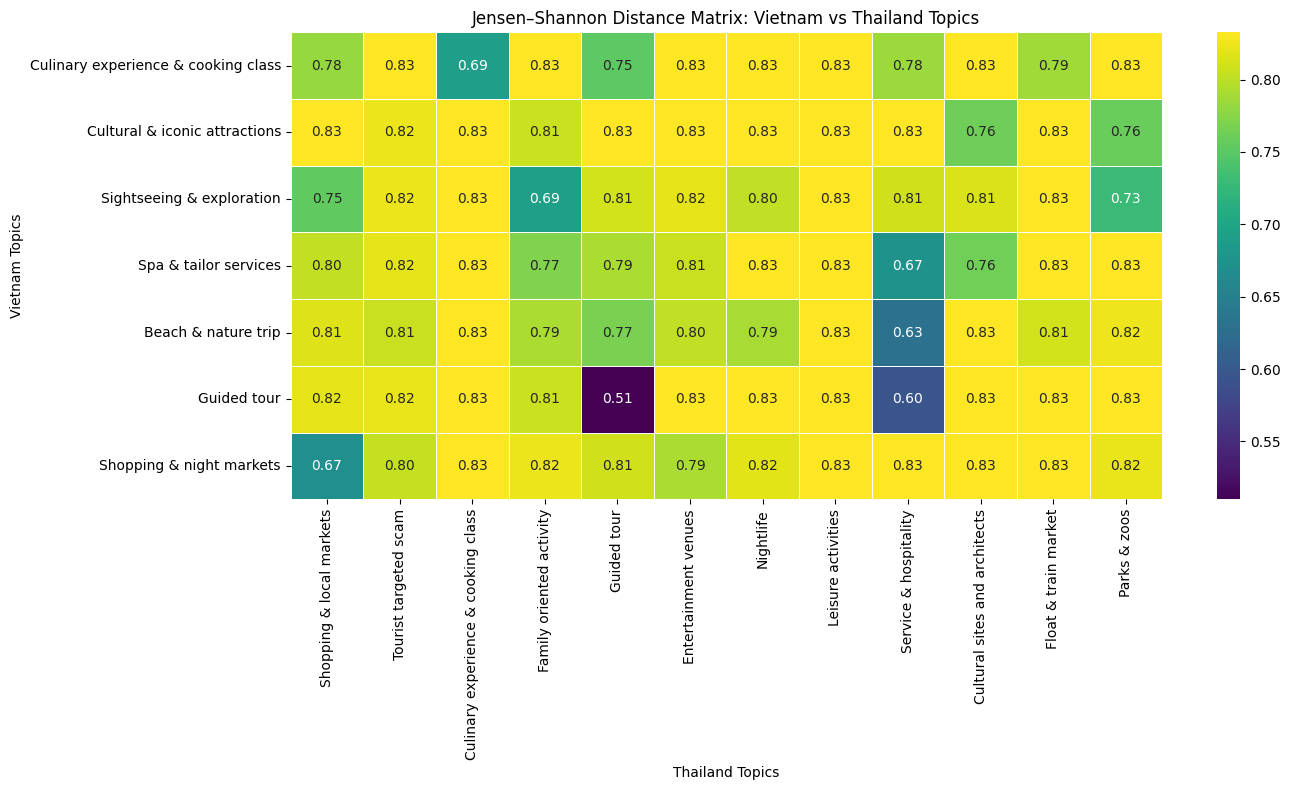

In [39]:
plt.figure(figsize=(14, 8))
sns.heatmap(distance_matrix.astype(float), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Jensen–Shannon Distance Matrix: Vietnam vs Thailand Topics")
plt.xlabel("Thailand Topics")
plt.ylabel("Vietnam Topics")
plt.tight_layout()
plt.savefig('JS_Distance_Matrix.jpg', dpi = 300, bbox_inches='tight')
plt.show()